In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline

In [2]:
car_df = pd.read_csv("D:\\CSVFiles\\cars-dataset.csv") 

In [3]:
#Question No 1

In [4]:
car_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
car_df.info() #horsepower should be numeric in nature, but is an object here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
car_df.describe() #hp is missing.

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [7]:
temp = pd.DataFrame(car_df.hp.str.isdigit()) 
temp[temp['hp'] == False] #missing values exist in hp

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [8]:
car_df = car_df.replace('?', np.nan) 

In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [10]:
car_df['hp'] = car_df['hp'].astype('float64')

In [11]:
car_df['hp'] = car_df['hp'].fillna(car_df['hp'].median()) #missing values filled.

In [12]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [13]:
car_df1 = car_df.drop('car name', axis=1) #dropping car name column as it is not valuable for our analysis.

In [14]:
car_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


In [15]:
#Question 2

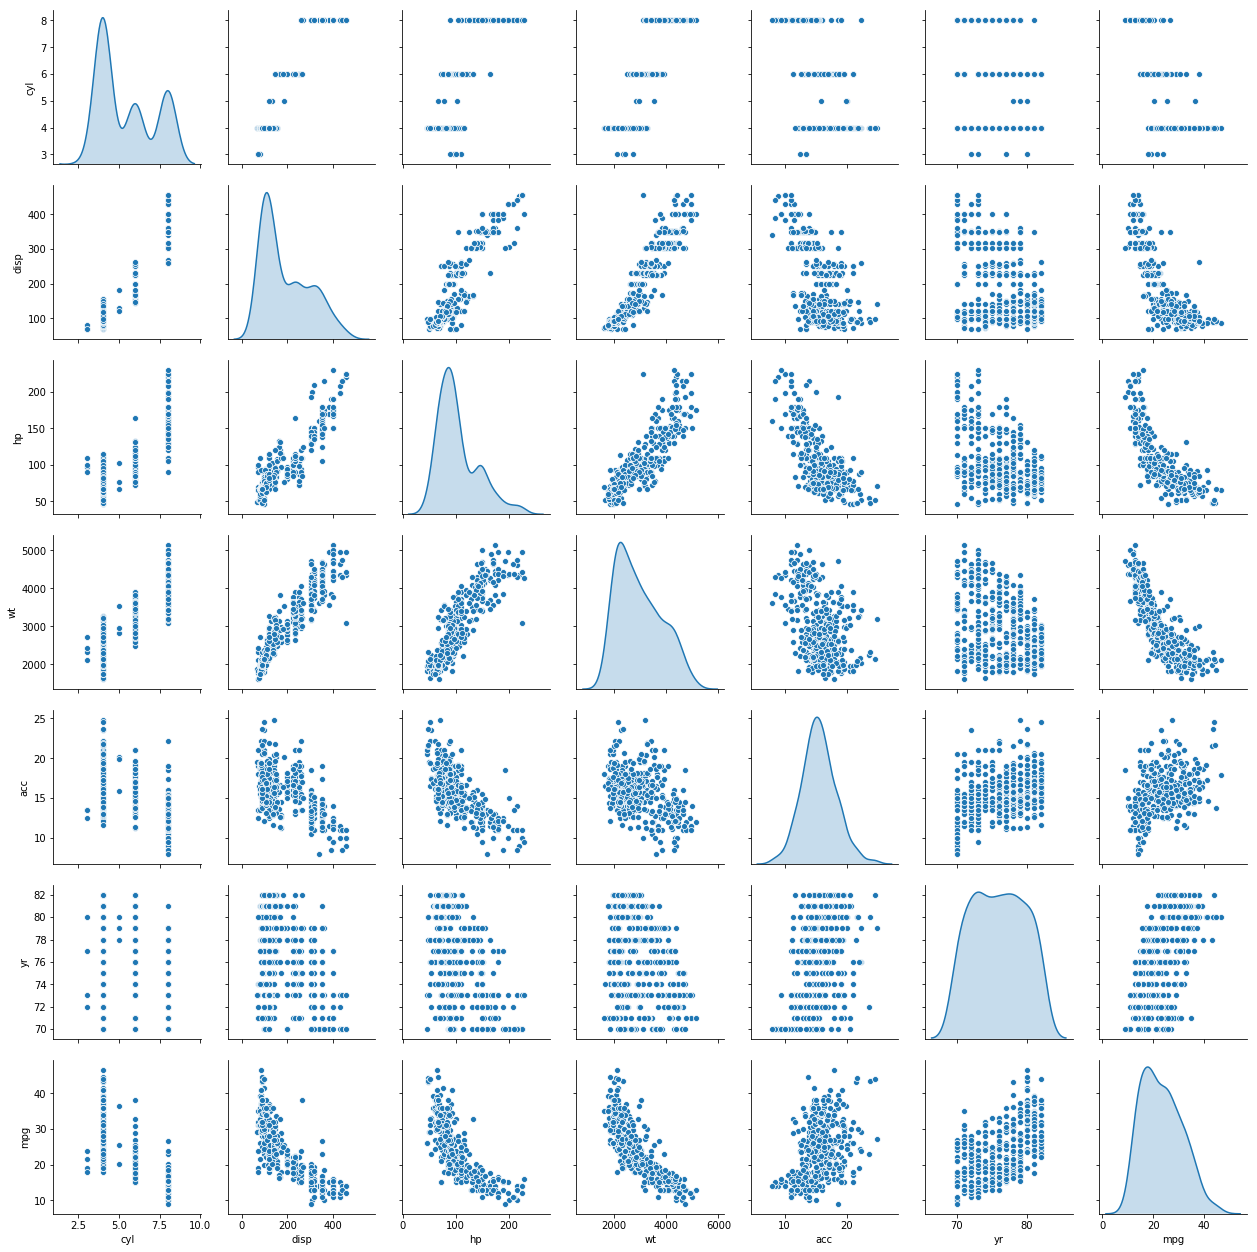

In [16]:
sns.pairplot(car_df1, diag_kind='kde') #we can see clearly three separations for 'cyl' and a little bit of 3 separations in 'disp' and 'hp'. However, in other attributes we see two or no separations.

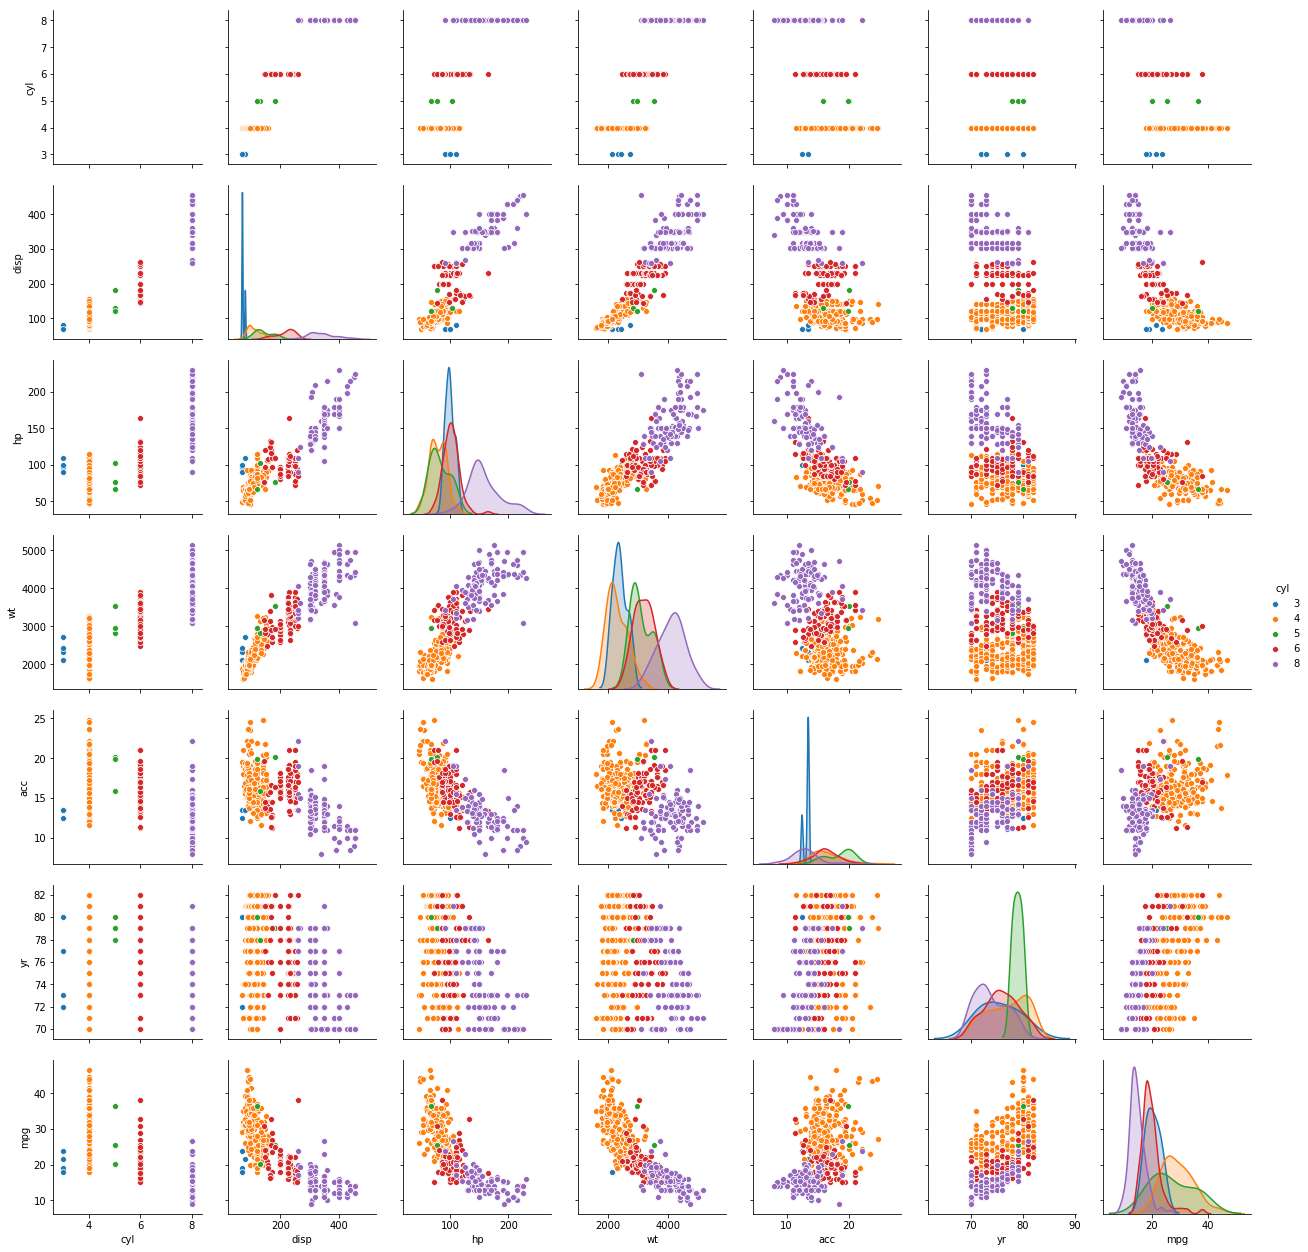

In [20]:
sns.pairplot(car_df1, diag_kind='kde', hue = 'cyl') #expecting 3 or 4 clusters

In [22]:
#Question 3

In [23]:
from sklearn.cluster import KMeans

In [24]:
cluster_range = range( 2, 10)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )

In [25]:
cluster_errors

[74289408.3666566,
 34207993.17528938,
 19056522.518919103,
 13769608.234056156,
 10294157.015140034,
 7662720.423499384,
 5661920.727864565,
 4734300.670215944]

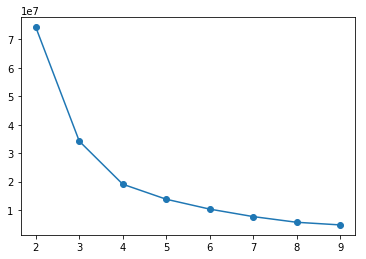

In [26]:
plt.plot( cluster_range, cluster_errors, marker = "o" ) # The elbow plot tells us that there are likely 3 or 4 clusters

In [28]:
from scipy.stats import zscore #scaling
car_df1 = car_df1.apply(zscore)

In [44]:
#3 clusters
cluster = KMeans( n_clusters = 3, random_state = 10 )
cluster.fit(car_df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [45]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.48641870e+00,  1.46865697e+00,  1.47338845e+00,
         1.36736404e+00, -1.03371846e+00, -6.11985765e-01,
        -1.12726026e+00,  1.05000000e+00],
       [-8.35484183e-01, -7.86401751e-01, -7.53490933e-01,
        -7.74738850e-01,  3.91693944e-01,  1.10198199e+00,
         1.18020408e+00, -2.44249065e-15],
       [-2.93146796e-01, -3.13525940e-01, -3.36185783e-01,
        -2.65896833e-01,  3.19515839e-01, -3.42299398e-01,
        -1.11551542e-01,  2.51891892e+00]])

In [46]:
centroid_df = pd.DataFrame(centroids, columns = list(car_df1) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.486419,1.468657,1.473388,1.367364,-1.033718,-0.611986,-1.127260,1.050000e+00
1,-0.835484,-0.786402,-0.753491,-0.774739,0.391694,1.101982,1.180204,-2.442491e-15
2,-0.293147,-0.313526,-0.336186,-0.265897,0.319516,-0.342299,-0.111552,2.518919e+00


In [47]:
prediction=cluster.predict(car_df1)
car_df1["GROUP"] = prediction

In [48]:
car_df1.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,100,100,100,100,100,100,100
1,113,113,113,113,113,113,113
2,185,185,185,185,185,185,185


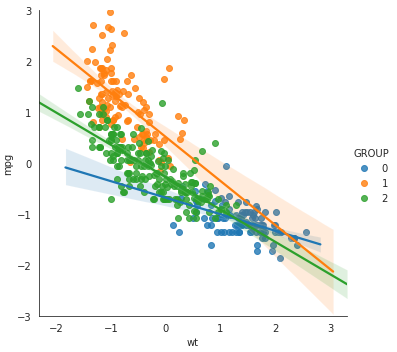

In [58]:
var = 'wt'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=car_df1,hue='GROUP')
plot.set(ylim = (-3,3))

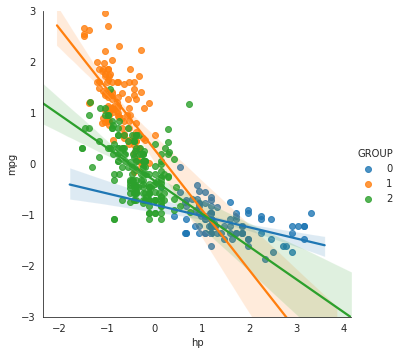

In [51]:
var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=car_df1,hue='GROUP')
plot.set(ylim = (-3,3))

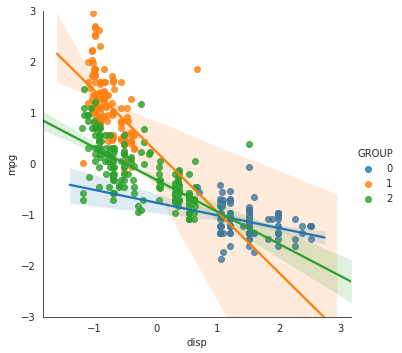

In [53]:
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=car_df1,hue='GROUP')
plot.set(ylim = (-3,3))

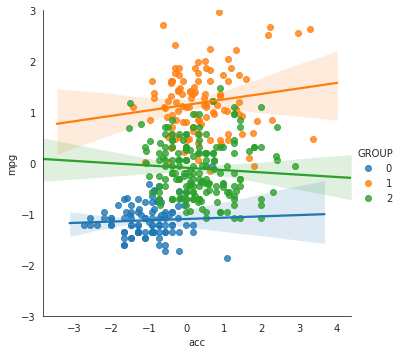

In [54]:
var = 'acc'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=car_df1,hue='GROUP')
plot.set(ylim = (-3,3))

In [59]:
#Question 4

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [73]:
car_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl      398 non-null float64
disp     398 non-null float64
hp       398 non-null float64
wt       398 non-null float64
acc      398 non-null float64
yr       398 non-null float64
mpg      398 non-null float64
GROUP    398 non-null int32
dtypes: float64(7), int32(1)
memory usage: 23.4 KB


In [76]:
car_df_gp0 = car_df1[car_df1['GROUP'] == 0]

In [78]:
car_df_gp0 = car_df_gp0.drop('GROUP', axis=1)

In [79]:
car_df_gp0

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,-1.090751
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,-1.218855
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,-1.218855
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,-1.218855
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,-1.090751


In [80]:
car_df_gp1 = car_df1[car_df1['GROUP'] == 1]
car_df_gp1 = car_df_gp1.drop('GROUP', axis=1)
car_df_gp1.shape

(113, 7)

In [81]:
car_df_gp2 = car_df1[car_df1['GROUP'] == 2]
car_df_gp2 = car_df_gp2.drop('GROUP', axis=1)
car_df_gp2.shape

(185, 7)

In [86]:
X = car_df_gp0[car_df1.columns[1:-1]]
y = car_df_gp0["mpg"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34)

In [88]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.coef_

array([ 2.37619839e-17, -1.51299516e-16,  1.60386869e-16,  1.54489840e-17,
       -1.89893178e-16,  1.00000000e+00])

In [91]:
X = car_df_gp1[car_df1.columns[1:-1]]
y = car_df_gp1["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.coef_

array([-2.69271151e-16,  4.06444213e-16,  3.75237949e-16,  4.04199649e-16,
        1.43115422e-16,  1.00000000e+00])

In [92]:
X = car_df_gp2[car_df1.columns[1:-1]]
y = car_df_gp2["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.coef_

array([-1.96345259e-16,  5.58894733e-16, -2.16226674e-16, -2.15869890e-16,
        2.68759519e-17,  1.00000000e+00])